# Overfitting in machine learning
## Mathieu BOLTEAU - [@mablt](TODO) - [mathieu.bolteau1@gmail.com](mailto:mathieu.bolteau1@gmail.com)

The aim of this notebook is to explain overfitting using [diabetes dataset](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html). The initial dataset (*initial_dataset.csv*) was trimmed to simplify the explanation into two files : *training.csv* and *test.csv*. Poynomial regression algorithm was used thanks to [`scikit-learn`](https://scikit-learn.org/stable/index.html) library.

## Library imports and function implementations

In [12]:
# Librairies imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


In [13]:
# Functions implementation
def f(x, coefs):
    """
    Calculate y thanks to the polynomial equation
    """
    y = int()
    for i in range(len(coefs)):
        y += coefs[i] * pow(x, i)
    return y

def real_prediction_display(real_points, equation_coefficients):
    """
    Display comparison between real and predicted points
    """
    # Turns [[x_1], ..., [x_n]] into [x_1, ..., x_n]
    real_points = np.concatenate(real_points)
    # Output prints
    print("Comparison:\n")
    print("\treal \t|\tpredicted")
    print("\t-------------------------")
    for point in range(len(real_points)):
        # Calculate the prediction
        prediction = f(point, equation_coefficients)
        print("\t{}\t|\t{}".format(point, prediction))

## Data imports
Training and test dataset are imported and preprocessed. Only label (quantitative measures of disease) and 'low-density lipoproteins' feature are kept. 

In [14]:
# Data imports
training_input_file = "training.csv"
training_df = pd.read_csv(training_input_file, '\t')
test_input_file = "test.csv"
test_df = pd.read_csv(test_input_file, '\t')

# Tranforms dataframes to numpy arrays
training_data = training_df.to_numpy()
test_data = test_df.to_numpy()

# Removing labels (last colum)
X_train = training_data[:,:-1]
X_test = test_data[:,:-1]

# Get only labels
y_train = training_data[:,-1]
y_test = test_data[:,-1]

# Select the 'low-density lipoproteins' feature
X_train = X_train[:, np.newaxis, 5]
X_test = X_test[:, np.newaxis, 5]

## Model creation and training
A 5-degrees polynomial regression is created. Then, it is trained with training dataset. Coefficients of the modelled polynomial regression are available. 

In [15]:
# Training step
model = Pipeline([('poly', PolynomialFeatures(degree=5)), ('linear', LinearRegression(fit_intercept=False))])
model.fit(X_train, y_train)

# Get coefficients of the polynomial regression constructed
polynomial_regression_coefficients = model.named_steps['linear'].coef_
print('Coefficients: \n', polynomial_regression_coefficients)

Coefficients: 
 [ 2.16164264e+06 -8.96056406e+04  1.46999724e+03 -1.19158820e+01
  4.76579579e-02 -7.50922045e-05]


## Training dataset fitting
Here, we fit training dataset to the model constructed before and we compare predicted data to 'real' data. 

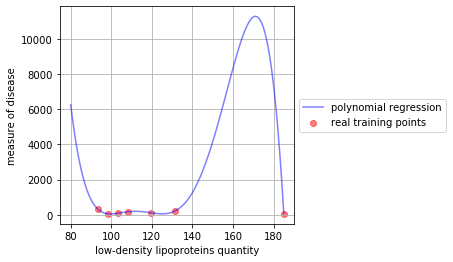

Comparison:

	real 	|	predicted
	-------------------------
	0	|	2161642.64128526
	1	|	2073495.1295808773
	2	|	1988216.7820260713
	3	|	1905737.8077513233
	4	|	1825989.541655975
	5	|	1748904.4353971626
	6	|	1674416.0483787567


<Figure size 432x288 with 0 Axes>

In [16]:
# Fit training data to the model
y_train_predicted = model.predict(X_train)

# Plot outputs
ax = plt.subplot(111)
# Plot real training data
ax.scatter(X_train, y_train,  color='red', alpha=0.5,  label="real training points")

# Plot the polynomial function
_x = np.arange(80,186)
ax.plot(_x, f(_x, model.named_steps['linear'].coef_), color='blue', alpha=0.5, label="polynomial regression")

ax.set_xlabel('low-density lipoproteins quantity')
ax.set_ylabel('measure of disease')
ax.grid(True)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Comparison between real and predicted training data
real_prediction_display(X_train, polynomial_regression_coefficients)


## Test dataset fitting
Now, we use unseen data and fit them to the model. A comparison similar to that made earlier is made.

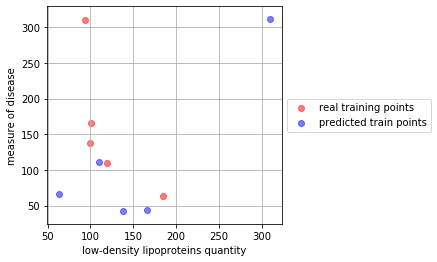

Comparison:

	real 	|	predicted
	-------------------------
	0	|	2161642.64128526
	1	|	2073495.1295808773
	2	|	1988216.7820260713
	3	|	1905737.8077513233
	4	|	1825989.541655975
	5	|	1748904.4353971626
	6	|	1674416.0483787567


<Figure size 432x288 with 0 Axes>

In [17]:
# Fit test data to the model
y_test_predicted = model.predict(X_test)

# Plot outputs
ax = plt.subplot(111)
ax.scatter(X_test, y_test,  color='red', alpha=0.5,  label="real training points")
ax.scatter(y_test, f(X_test, model.named_steps['linear'].coef_), color='blue', alpha=0.5, label="predicted train points")
ax.set_xlabel('low-density lipoproteins quantity')
ax.set_ylabel('measure of disease')
ax.grid(True)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Comparison between real and predicted test data
real_prediction_display(X_train, polynomial_regression_coefficients)